Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Your task is to make a mode that can consider the data provided and predict the Average Price.

In [274]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [275]:
df = pd.read_csv(r"C:\Users\HP\Desktop\avocado.csv",engine='python')

In [276]:
df.shape

(18249, 14)

In [277]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The dataset comprises of 16468 observations of 14 columns. Below is a table showing names of all the columns and their description.

The unclear numerical variables terminology is explained in the next section:

Features	Description
‘Unamed: 0’	 index feature that will be removed later
‘Total Volume’	Total sales volume of avocados
‘4046’	Total sales volume of Small/Medium Hass Avocado
‘4225’	Total sales volume of Large Hass Avocado
‘4770’	Total sales volume of Extra Large Hass Avocado
‘Total Bags’	Total number of Bags sold
‘Small Bags’	Total number of Small Bags sold
‘Large Bags’	Total number of Large Bags sold
‘XLarge Bags’	Total number of XLarge Bags sold


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [279]:
df.isnull().sum() 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [280]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [281]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [282]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [283]:
# Date is Object type not the date type. We have to change its type to date type.

In [284]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [285]:
df.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


* Data Visualisation. 
Let's see if this is also the case with our dataset

First let's take a look at the distribution.

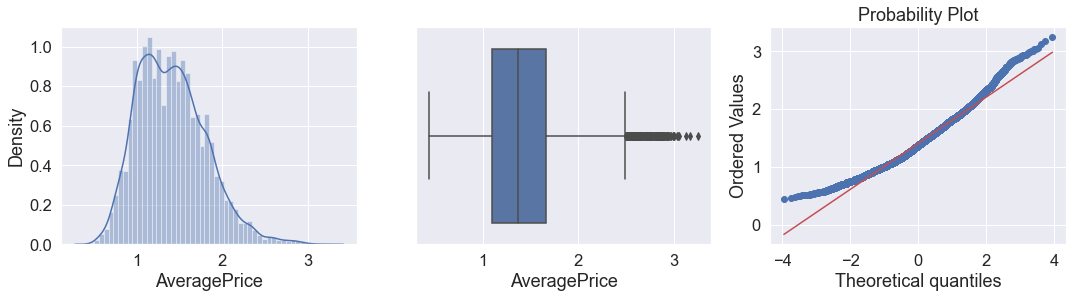

In [286]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df.AveragePrice, ax=ax[0])
sns.boxplot(df.AveragePrice, ax=ax[1])
from scipy import stats
stats.probplot(df['AveragePrice'], plot=ax[2])
plt.show()

Conclusion: Bimodal distribution because conventional versus organic.

In [287]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

there are two types: conventional and organic

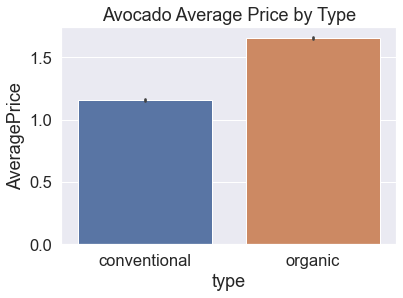

In [288]:
plt.figure()
plt.title("Avocado Average Price by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

In [289]:
conventional = len(df[df.type== "conventional"])
organic = len(df[df.type == "organic"])
print("Percentage of conventional: {:.2f}%".format((conventional / (len(df.type))*100)))
print("Percentage of organic: {:.2f}%".format((organic / (len(df.type))*100)))

Percentage of conventional: 50.01%
Percentage of organic: 49.99%


Conclusion: data is almost 50% conventional and 50% organic.

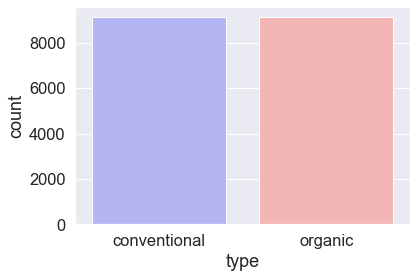

In [290]:
sns.countplot(x="type", data=df, palette="bwr")
plt.show()

In [291]:
print("Skewness: %f" % df['AveragePrice'].skew())


Skewness: 0.580303


 skewness fall between − 3 and + 3. so it is acceptable

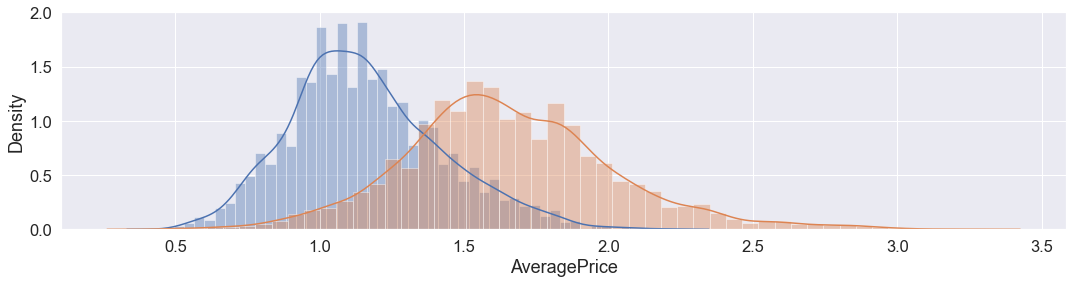

In [292]:
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice']) # histogram
sns.distplot(df_organic['AveragePrice']) # histogram
plt.show()

Conclusion: The organic avocados are more expensive.

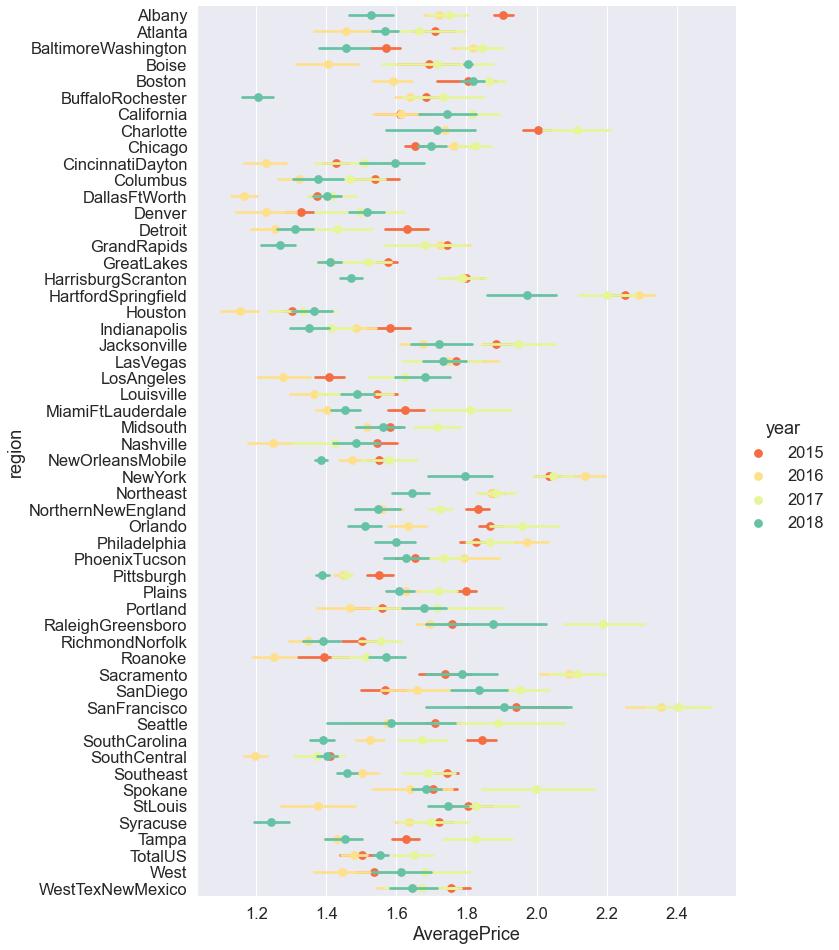

In [293]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
    hue='year',size=13,aspect=0.8,palette='Spectral',join=False,)

Conclusion: The price not only depends on the type, but also on the region.

<AxesSubplot:title={'center':'Correlation Matrix'}>

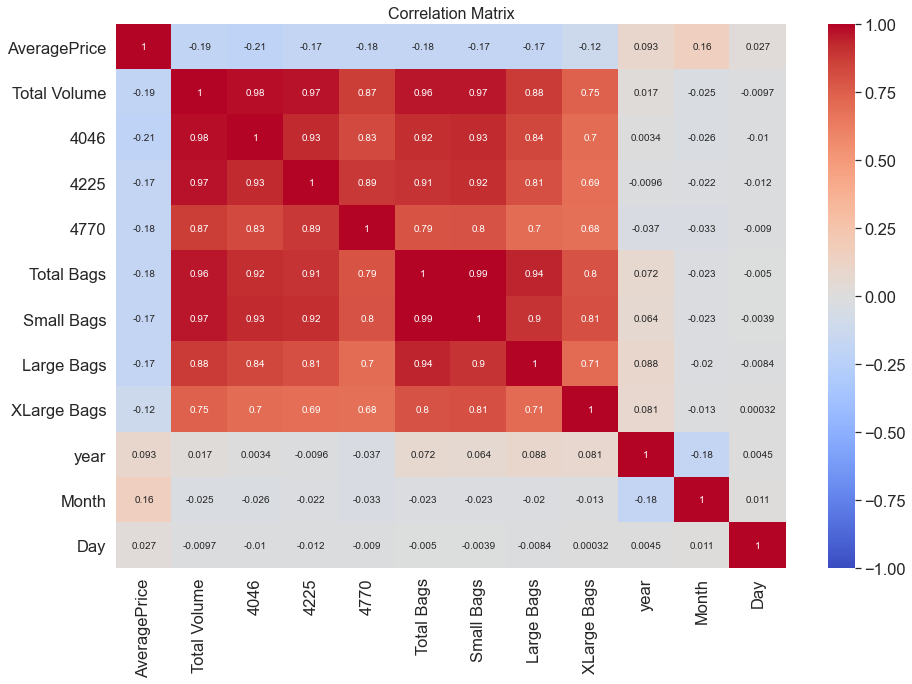

In [294]:
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.set_title("Correlation Matrix", fontsize=16)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Total Volume (98) and Total Bags (99) also have a strong correlation.
all the Features are not correleted with the Average Price column
instead most of them are correlated with each other.

In [295]:
print(f"Missing data: {df.isna().sum(axis=0).any()}")


Missing data: False


In [296]:
df['type']= df['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

<AxesSubplot:xlabel='AveragePrice'>

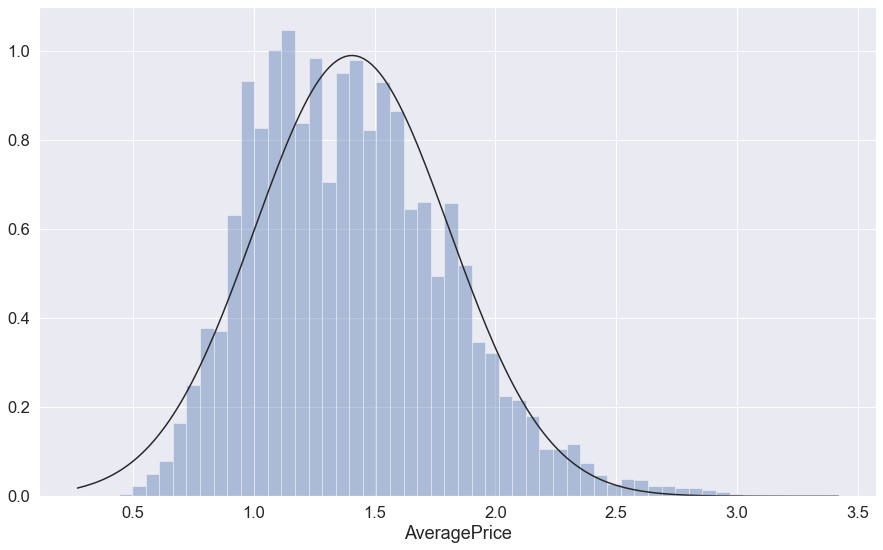

In [297]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4.

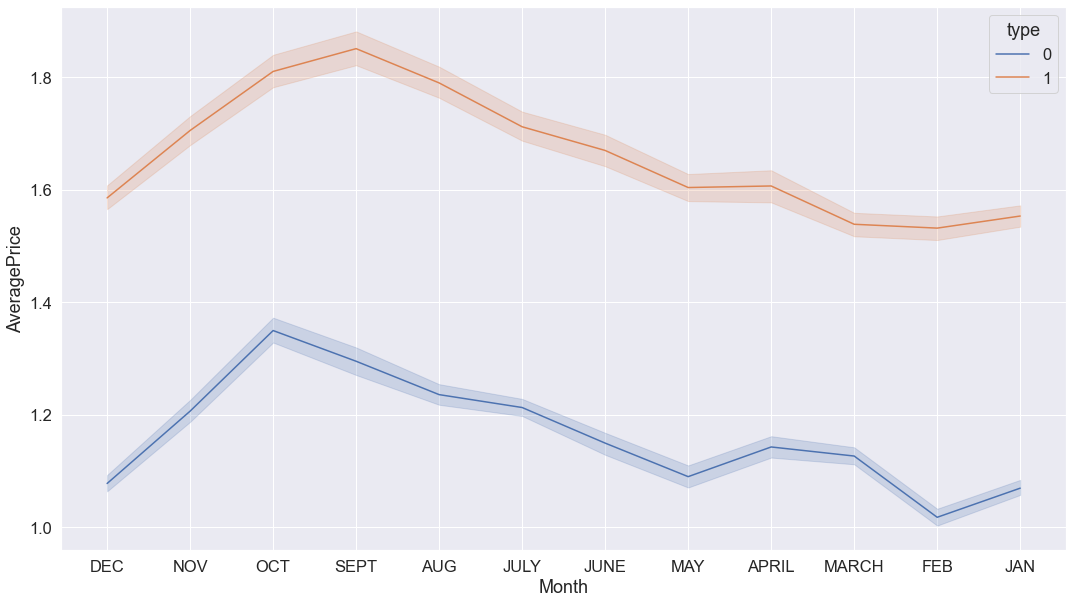

In [298]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

 there was a hike between months 8 – 10 for Avocados prices

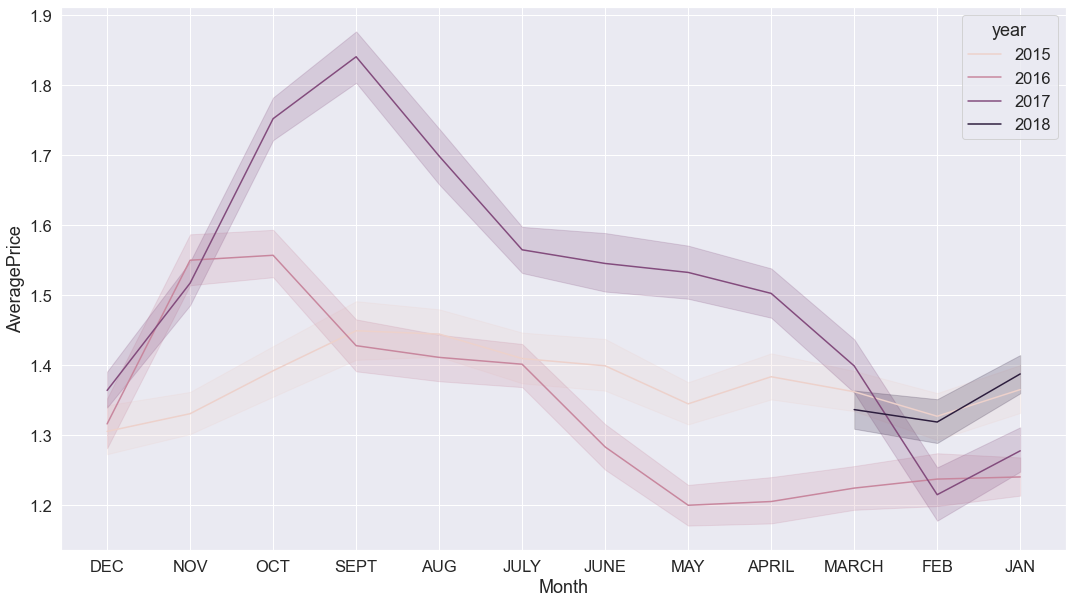

In [299]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df)
plt.show()

 there was a hike between months 8 – 10 for Avocados prices every year and maximum with 2018

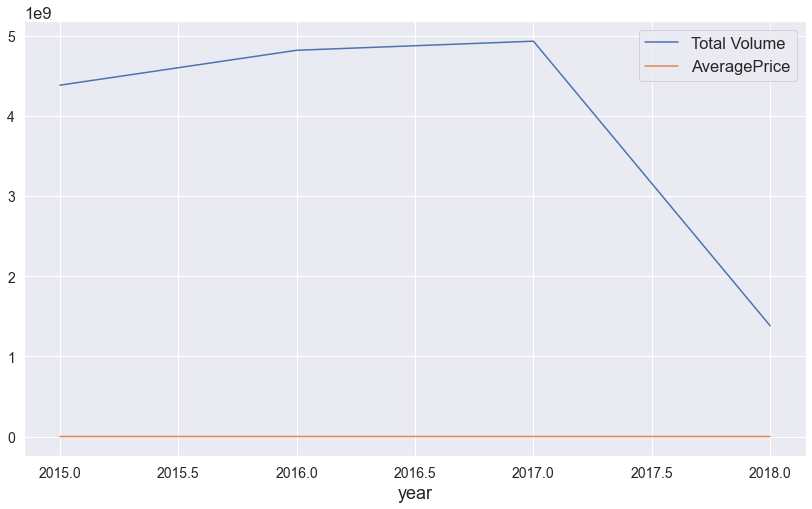

In [300]:
Year = df[['Total Volume' ,'AveragePrice']].groupby(df.year).sum()
Year.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

a strong dip is observed after 2017 

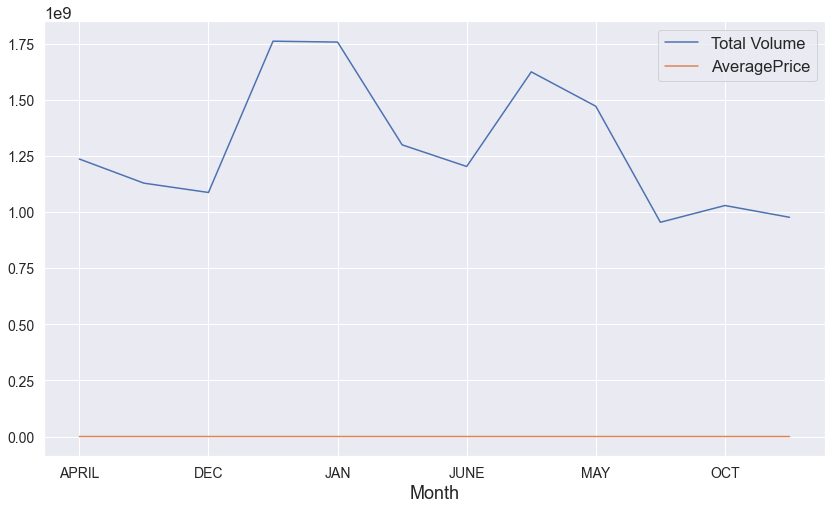

In [301]:
Month = df[['Total Volume', 'AveragePrice']].groupby(df.Month).sum()
Month.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

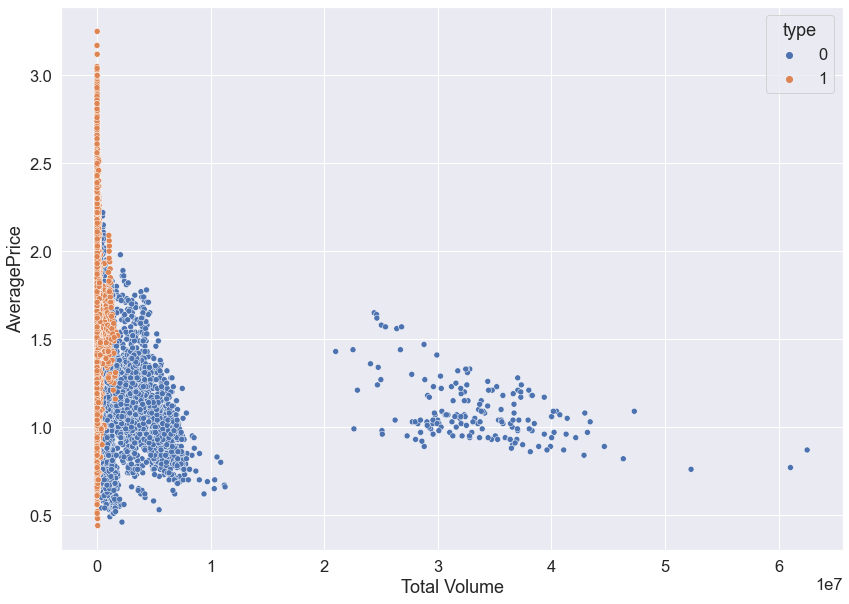

In [302]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= df)


Conclusion: The organic avocados are more expensive.

<AxesSubplot:xlabel='Month'>

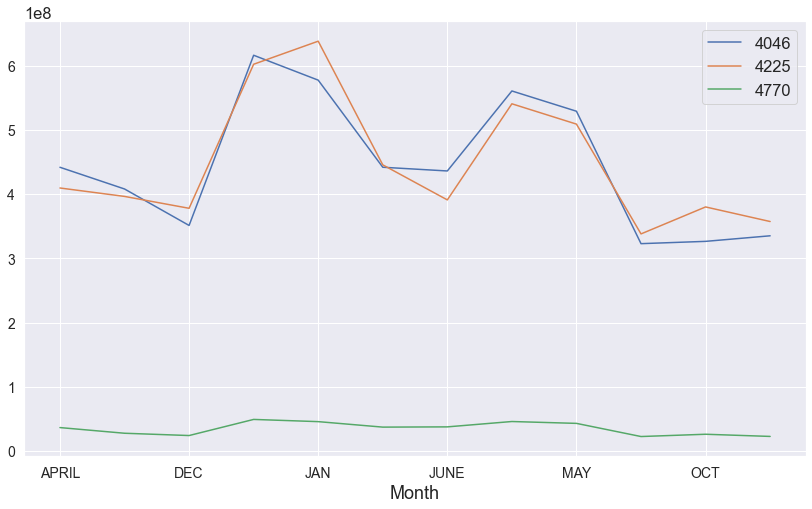

In [303]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))

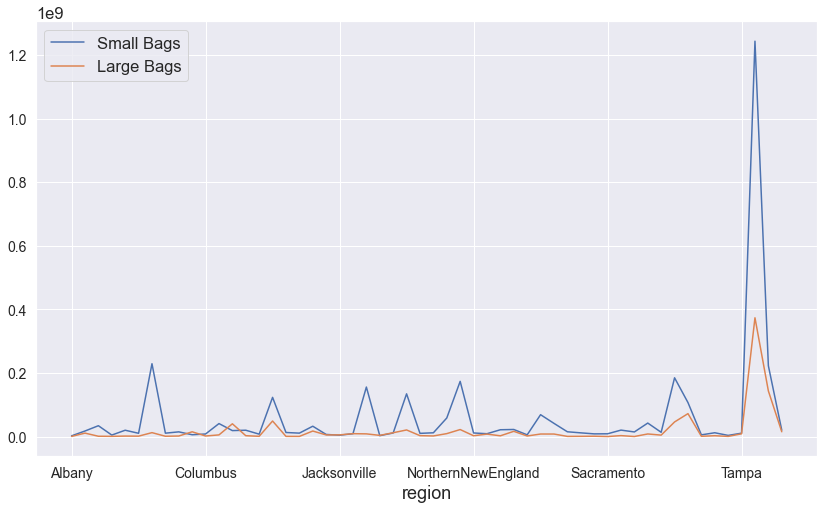

In [304]:
Bags = df[['Small Bags', 'Large Bags']].groupby(df.region).sum()
Bags.plot(kind='line', fontsize = 14,figsize=(14,8))
plt.show()

shows demand of small bags,large bags is high in tampa region .

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

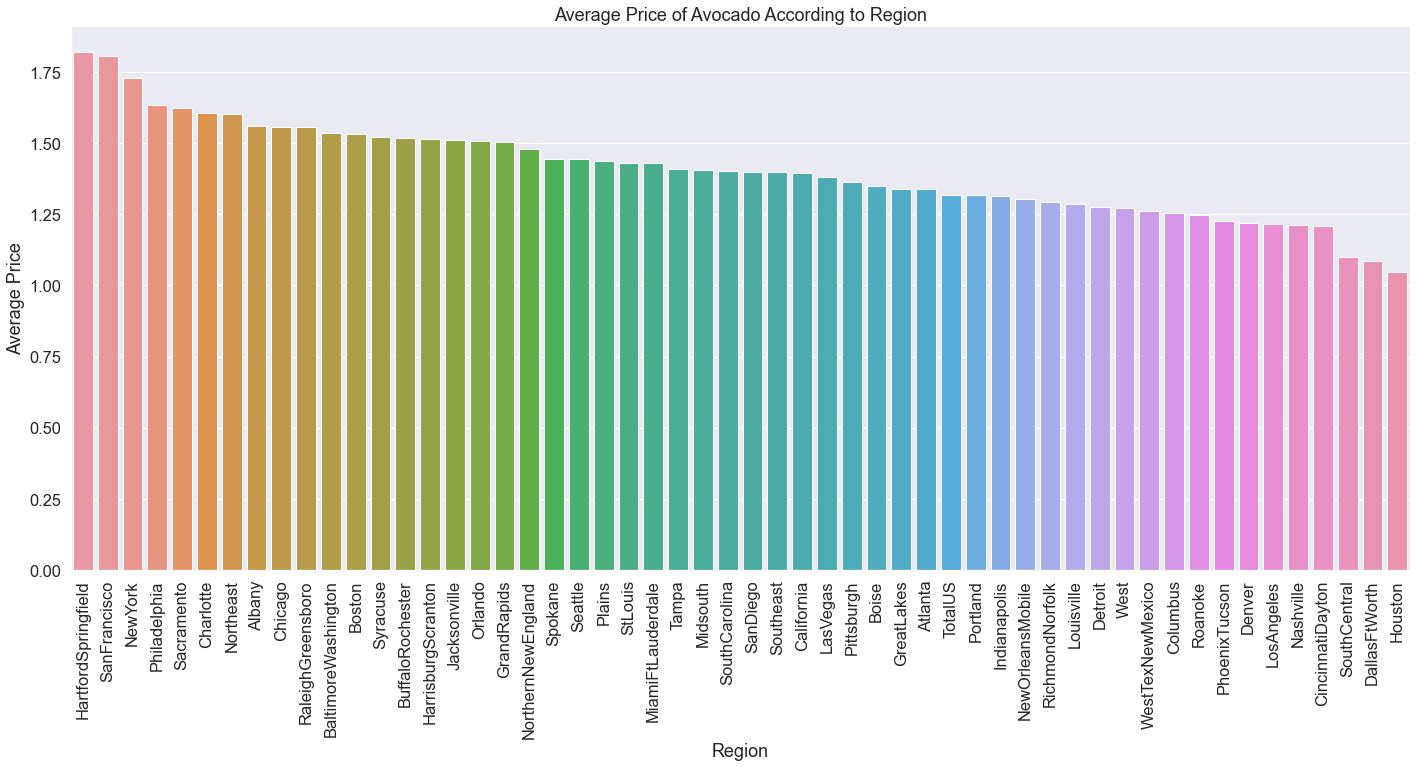

In [305]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high
HartfordSpringfield
SanFrancisco
NewYork
Philadelphia
Sacramento

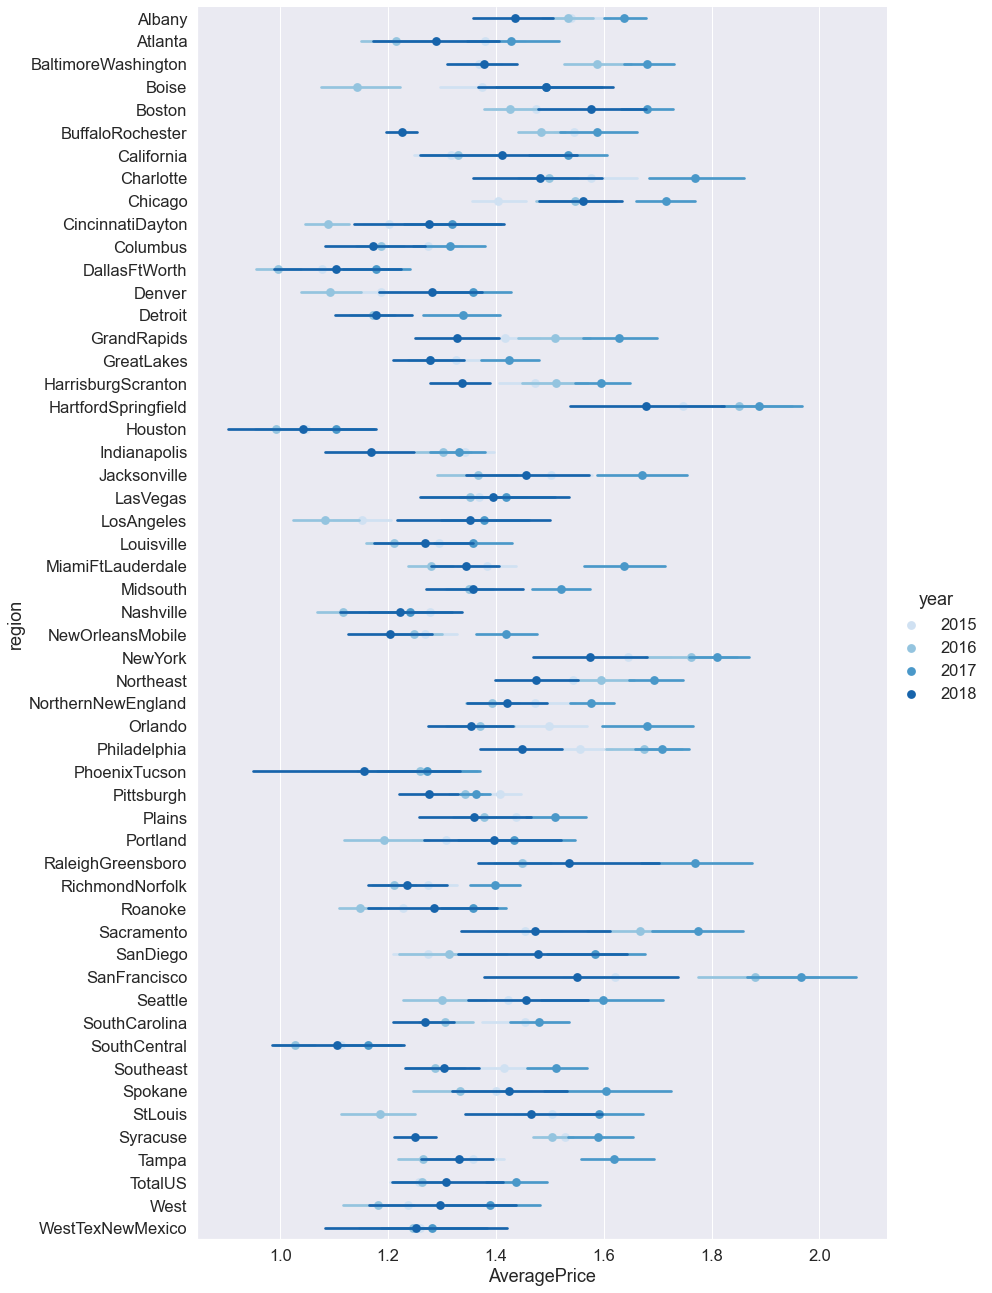

In [306]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region

In [307]:
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = df['AveragePrice']


In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)


In [309]:
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [310]:
from sklearn.linear_model import LinearRegression
lrg=LinearRegression()
lrg.fit(X_train,y_train)
pred=lrg.predict(X_test)

In [311]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.18879373957930076
MSE: 0.06144492699716669
RMSE: 0.24788087259239405


In [312]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [313]:
cv_score= cross_val_score(lrg,X_train,y_train, cv=5)
np.mean(cv_score)


0.6237309022488271

In [314]:
y_pred = lrg.predict(X_test)
lrg.score(X_test,y_test)

0.6191546184787249

In [315]:
test_pred = lrg.predict(X_test)
train_pred = lrg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.18879373957930076
MSE: 0.06144492699716669
RMSE: 0.24788087259239405
R2 Square 0.6191546184787249
Train set evaluation:
_____________________________________
MAE: 0.18613968761321867
MSE: 0.06030316284907629
RMSE: 0.24556702313029796
R2 Square 0.6288621188511156


In [316]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [317]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.09510823744292236
MSE: 0.018100496873059355
RMSE: 0.1345380870722464


In [318]:
cv_score= cross_val_score(rdr,X_train,y_train, cv=5)
np.mean(cv_score)

0.8737991012694586

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

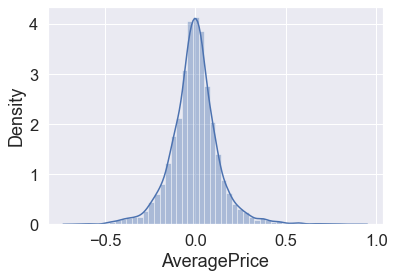

In [319]:
sns.distplot((y_test-pred),bins=50)

residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

In [320]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model = XGBRegressor()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

Training Score: 0.9551503916258617
Testing Score: 0.8929820441105097


In [321]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.09510823744292236
MSE: 0.018100496873059355
RMSE: 0.1345380870722464


In [322]:
cv_score= cross_val_score(model,X_train,y_train, cv=5)
np.mean(cv_score)

0.8902425914450663

  RMSE is lower than the previous ones we got with Linear Regression,random forest

In [323]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.19288025985871027
MSE: 0.06468652619946458
RMSE: 0.25433545997258145
R2 Square 0.5990626736222335
Train set evaluation:
_____________________________________
MAE: 0.19007482234185535
MSE: 0.06331331062415725
RMSE: 0.25162136360841314
R2 Square 0.6103360612712736


In [324]:
cv_score= cross_val_score(lrg,X_train,y_train, cv=5)
np.mean(cv_score)

0.6237309022488271

out of all XGBoost has a score of 89% which is pretty good. 

MAE: 0.09510624657534247
MSE: 0.018950787589041104
RMSE: 0.13766185960185598
    
having cv score of 0.887672496579831

In [325]:
# saving the model

In [326]:
best_model = XGBRegressor()
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [327]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'avocado.pkl')

['avocado.pkl']

Conclusions
EDA can be carried out using Pandas and other plotting libraries.
Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.

I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
I get to know what are the features on which price is highly positively and negatively coorelated with.
I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
 Also get to know where to use Linear, xgbooster and other applicable and required models to fine tune the predictions.